使うときはPoetryを使ってください。
```bash
$ poetry install
$ poetry shell
```
Windowsで作動しなかった場合、Linuxでお試しください。


Poetry 作動後：

VSCodeでこのファイル開いた際，画面右上に出てくる「カーネルを選択」ボタンを押し，「Python 仮想環境」を選択。

Larva 専用の poetry venv を選択する。

エラーが出た場合，Vscodeに jupyter notebook がインストールされていない可能性がある。

All files and directories in output/CAD/bodies have been removed.
All files and directories in output/CAD/dwg have been removed.
All files and directories in output/image have been removed.
All files and directories in output/CAD/obj have been removed.
All files and directories in output/CAD/stl have been removed.
All files and directories in output/infos have been removed.
All files and directories in output/video have been removed.
All files and directories in output/slices have been removed.


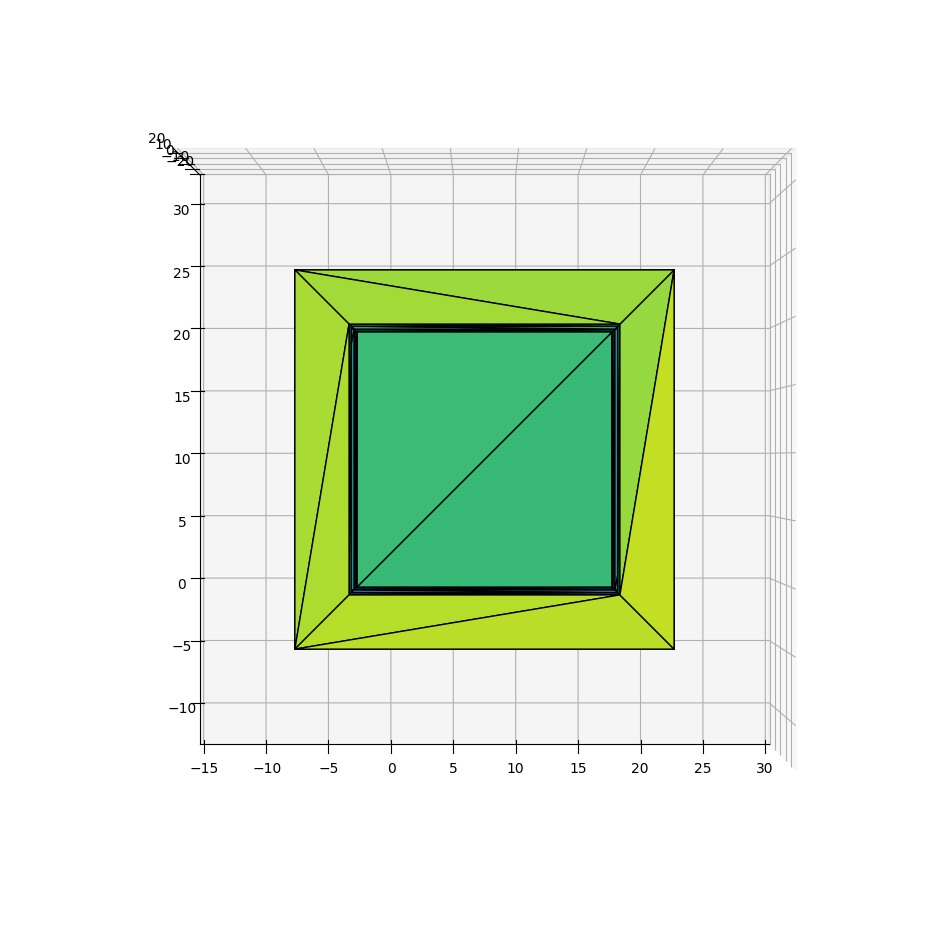

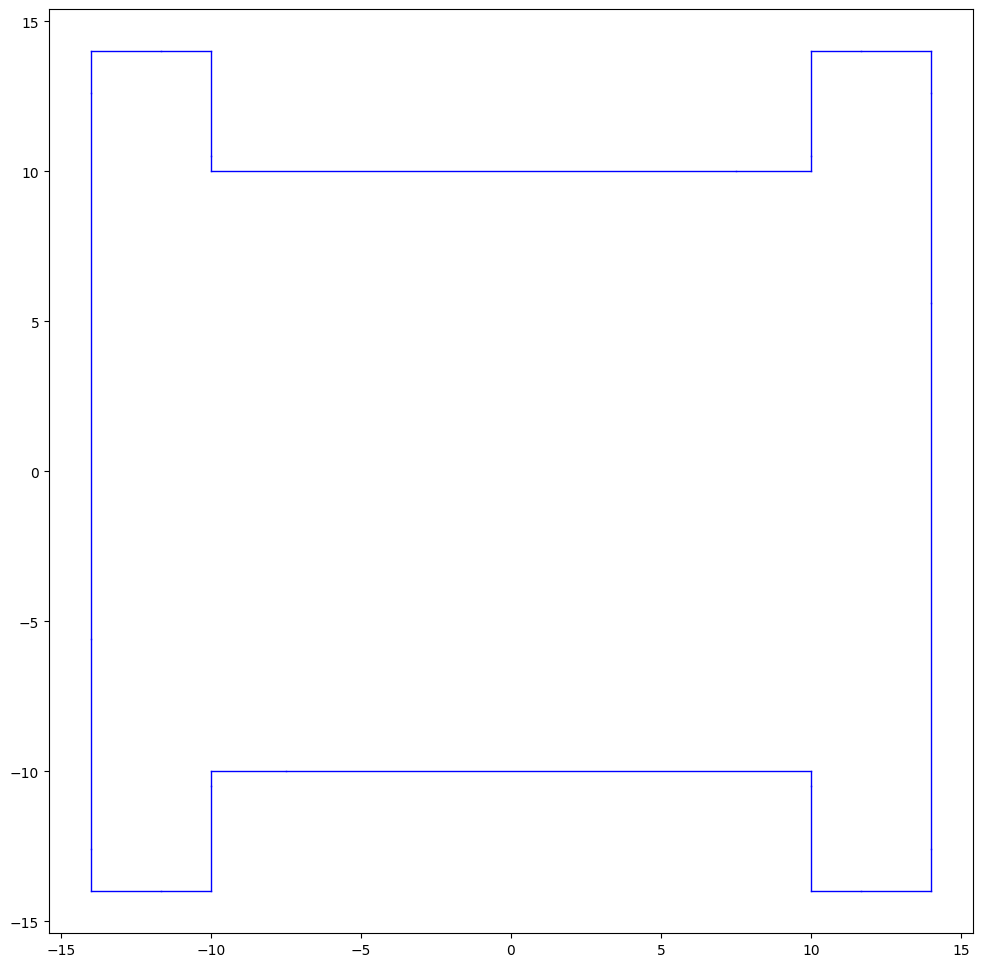

DWG view saved as output/image/dwg_view.png


In [ ]:
import Larva.direct_data_handler as dh

stl_path = "data/stl/test_subject.stl" ## STLデータ入力
tri = dh.trimesh.load_mesh(stl_path)  ## STLメッシュを読み込む

dh.clear_output_paths()


dh.view_stl_sub(stl_path,dh.image_output_dir,) ## STLデータを見る


slice = dh.slice_stl(tri,[0,0,1],[0,0,-10],printDeets=False) ## STL物体をスライス面（方向ベクトル [0,0,1]，面上の点の位置ベクトル [0,0,-10] ）でスライシング
slice.saveas( "output/CAD/dwg/slice.dwg") ## スライス（断面図）を "slice.dwg" のDWG２次元図面として保存する

dh.view_dwg("output/CAD/dwg/slice.dwg","output/image") ## 保存したDWGファイルを閲覧する



In [ ]:
dh.clear_output_paths()


slices = dh.width_slice_stl(tri,4,[0,0,1])  ## スライス面 [0,0,1]，材料厚さ 4mm でSTLデータを連続的にスライシングする
grid_packed = dh.grid_pack_dwg(slices)  ## グリッド・パッキングアルゴリズムで各断面図を一つの図面に落とし込める
grid_packed.saveas("output/CAD/dwg/sliced.dwg")  ## パッキングした図面を保存する


dh.view_dwg("output/CAD/dwg/sliced.dwg","output/image")  ## 保存したDWGファイルを閲覧する

In [ ]:
dh.clear_output_paths()


dh.Bs_view_stl(stl_path)  ## view the stl object


least_slices = dh.directional_slice_stl(tri,4,printDeets=False)  ## 様々な方向から部品を組み合わせる機能（開発途中），材料の厚さ 4mm
least_grid_packed = dh.grid_pack_dwg(least_slices)  ## グリッド・パッキングアルゴリズムで各部品の図面を一つの図面に落とし込める
least_grid_packed.saveas("output/CAD/dwg/least_sliced.dwg")  ## パッキングした図面を保存する


dh.view_dwg("output/CAD/dwg/least_sliced.dwg","output/image")  ## 保存したDWGファイルを閲覧する